In [4]:
import matplotlib.pyplot as plt
import numpy as np


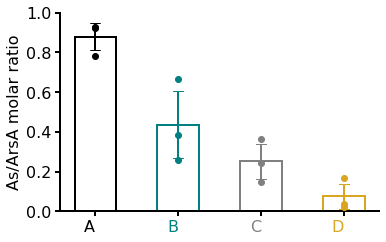

In [5]:
#XAS post-run samples 
# Use a fallback font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Data
triplicate_data = {
    'A': [18.4, 21.8, 21.7],
    'B': [6.1, 9.0, 15.6],
    'C': [3.5, 5.7, 8.5],
    'D': [0.9, 0.5, 3.9],
   
}

protein_uM = 0.313
As_molarmass = 75

means = {key: np.mean(values) for key, values in triplicate_data.items()}
std_devs = {
    key: np.std(values) if len(values) > 1 else 0
    for key, values in triplicate_data.items()
}

measured_ppb = np.array(list(means.values()))
measured_uM = measured_ppb / As_molarmass
molar_ratios = measured_uM / protein_uM
std_devs_normalized = np.array(list(std_devs.values())) / As_molarmass / protein_uM

samples = list(triplicate_data.keys())
x_pos = np.arange(len(samples))

# Define colors for each sample
colors = ['black', 'teal', 'gray', 'goldenrod']

# Create the figure with a custom size to ensure enough room for everything
plt.figure(figsize=(6, 4))


# Adjust x positions for tighter spacing
x_pos = np.linspace(0, len(samples) - 1, len(samples))  # Spread positions evenly

# Reduce bar width
bar_width = 0.5  # Reduce bar width for tighter appearance

# Plot bars with only colored outlines and reduced spacing
for i, color in enumerate(colors):
    plt.bar(x_pos[i], molar_ratios[i], yerr=std_devs_normalized[i], capsize=5,
            width=bar_width, edgecolor=color, linewidth=2, facecolor='none',
            label='Mean ± SD' if i == 0 else None)

    # Set error bars to the same color as scatter dots
    plt.errorbar(x_pos[i], molar_ratios[i], yerr=std_devs_normalized[i],
                 color=color, capsize=5, linestyle='None', elinewidth=2)

# Overlay individual data points with matching scatter colors
for i, (key, values) in enumerate(triplicate_data.items()):
    # Normalize individual data points
    normalized_values = np.array(values) / As_molarmass / protein_uM
    plt.scatter([x_pos[i]] * len(values), normalized_values,
                color=colors[i], zorder=5, label='Individual data' if i == 0 else None)
    
# Customize x-axis labels to match bar colors
ax = plt.gca()
ax.set_xticks(x_pos)
ax.set_xticklabels(samples, fontsize=16, weight='normal')

# Color each x-label
for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)

plt.ylim(0,1)

# Customize plot
plt.xticks(x_pos, samples, ha='right', fontsize=16, weight='normal')
plt.yticks(fontsize=16, weight='normal')  # Make y-axis values not bold
plt.ylabel('As/ArsA molar ratio', fontsize=16, weight='normal')

# Increase tick mark size
plt.tick_params(axis='both', length=5, width=2)  # Increase tick mark length and width


# Modify spines
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)  # Remove top spine
ax.spines['right'].set_visible(False)  # Remove right spine
ax.spines['left'].set_linewidth(2)  # Make left spine thicker
ax.spines['bottom'].set_linewidth(2)  # Make bottom spine thicker

# Adjust layout to fit everything in the figure box
plt.tight_layout(pad=3.0)  # Increase padding

# Save plot in EPS format
plt.savefig('20250131_ICPMS.eps', format='eps', dpi=300)
plt.show()